# Stock Price Prediction using ARIMA Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARMA

# AXIS BANK

In [2]:
axis_df=pd.read_csv('HDFCBANK.csv')

In [3]:
axis_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.0,9791881.0,0.6491
5302,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.0,5650216.0,0.5488
5303,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.0,7196647.0,0.5971
5304,2021-04-29,HDFCBANK,EQ,1476.80,1486.20,1503.65,1461.00,1471.65,1472.50,1481.15,12039276,1.783196e+15,252296.0,4818551.0,0.4002


We observe NaN values in some rows/columns. Also we will be using the timeline Jan 2021 to Dec 2021 for prediction 

First let us remove the NaN values from the dataset

In [4]:
axis_df=axis_df.dropna()

This line drops any rows from the DataFrame that contain missing values (NaN)

In [5]:
axis_df.index = pd.to_datetime(axis_df.Date)

In [6]:
axis_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2011-06-01,2011-06-01,HDFCBANK,EQ,2399.55,2390.00,2407.00,2374.75,2404.95,2398.20,2397.60,657167,1.575623e+14,32536.0,374167.0,0.5694
2011-06-02,2011-06-02,HDFCBANK,EQ,2398.20,2355.05,2366.70,2345.00,2361.00,2360.30,2356.74,672276,1.584380e+14,33279.0,391660.0,0.5826
2011-06-03,2011-06-03,HDFCBANK,EQ,2360.30,2359.95,2370.85,2348.50,2364.00,2356.75,2358.69,598853,1.412506e+14,26661.0,340110.0,0.5679
2011-06-06,2011-06-06,HDFCBANK,EQ,2356.75,2345.30,2390.00,2345.30,2390.00,2381.25,2366.03,584280,1.382424e+14,22785.0,409487.0,0.7008
2011-06-07,2011-06-07,HDFCBANK,EQ,2381.25,2365.10,2390.70,2363.80,2374.60,2376.50,2377.48,406347,9.660803e+13,11760.0,266423.0,0.6557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,15085476,2.131861e+15,291268.0,9791881.0,0.6491
2021-04-27,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,10296453,1.472810e+15,233200.0,5650216.0,0.5488
2021-04-28,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,12051970,1.763438e+15,197146.0,7196647.0,0.5971


we will change the index of the dataframe so that we can easily slice the values we need.

In [7]:
axis_df = axis_df["Prev Close"]['2021-04-01':'2021-04-30']

In [8]:
#axis_df

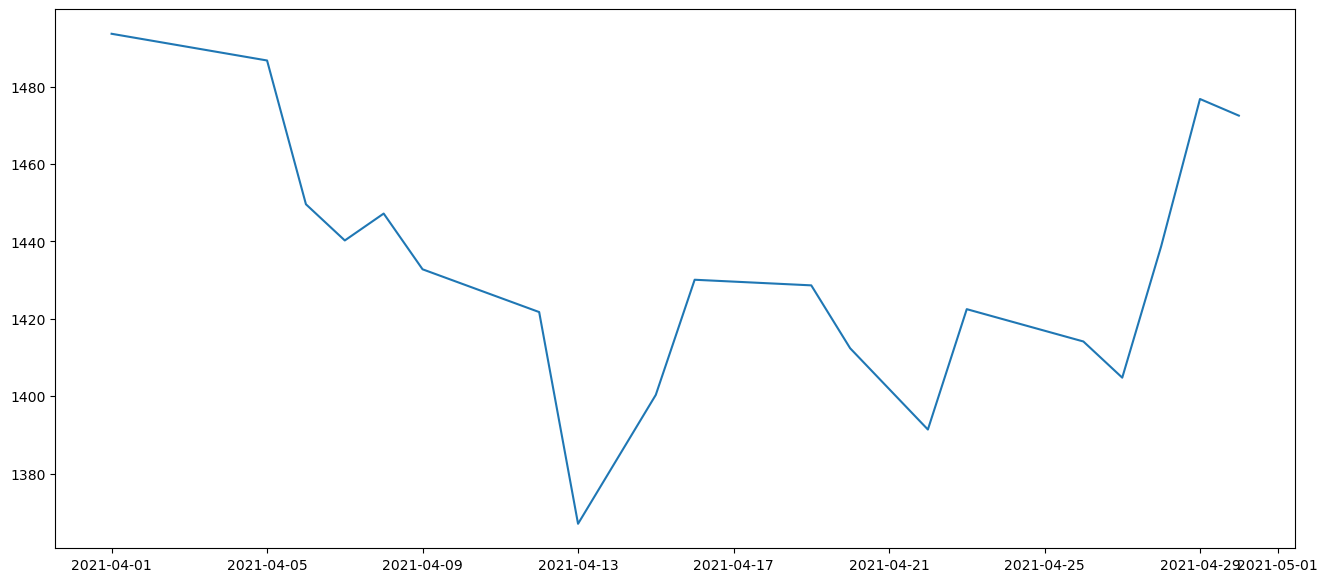

In [9]:
plt.figure(figsize=(16,7))
plt.plot(axis_df)


Checking stationarity is an important step in the ARIMA (Autoregressive Integrated Moving Average) model because ARIMA models require the time series data to be stationary for accurate predictions. Stationarity refers to the property of a time series where the statistical properties, such as the mean and variance, remain constant over time.

Stationary time series exhibit consistent patterns and correlations over time. Autocorrelation, which is the correlation between a time series and its lagged values, is a fundamental aspect of ARIMA models. If the time series is non-stationary, the autocorrelation structure may change over time, making it difficult to capture and predict future patterns accurately.

# Rolling Statistics

Rolling Statistics: Rolling statistics involve calculating statistical measures (such as mean, variance, or other metrics) over a rolling window of observations in a time series. This technique helps assess whether the statistical properties of the time series are changing over time. By observing changes in rolling statistics, one can identify trends, seasonality, or other variations.
For example, a common rolling statistic is the rolling mean, which calculates the average of the time series values over a specified window. By plotting the rolling mean along with the original time series, one can visually examine if the mean remains relatively constant or exhibits a trend.

In [10]:
rollmean = axis_df.rolling(2).mean()
rollstd = axis_df.rolling(2).std()

<function matplotlib.pyplot.show(close=None, block=None)>

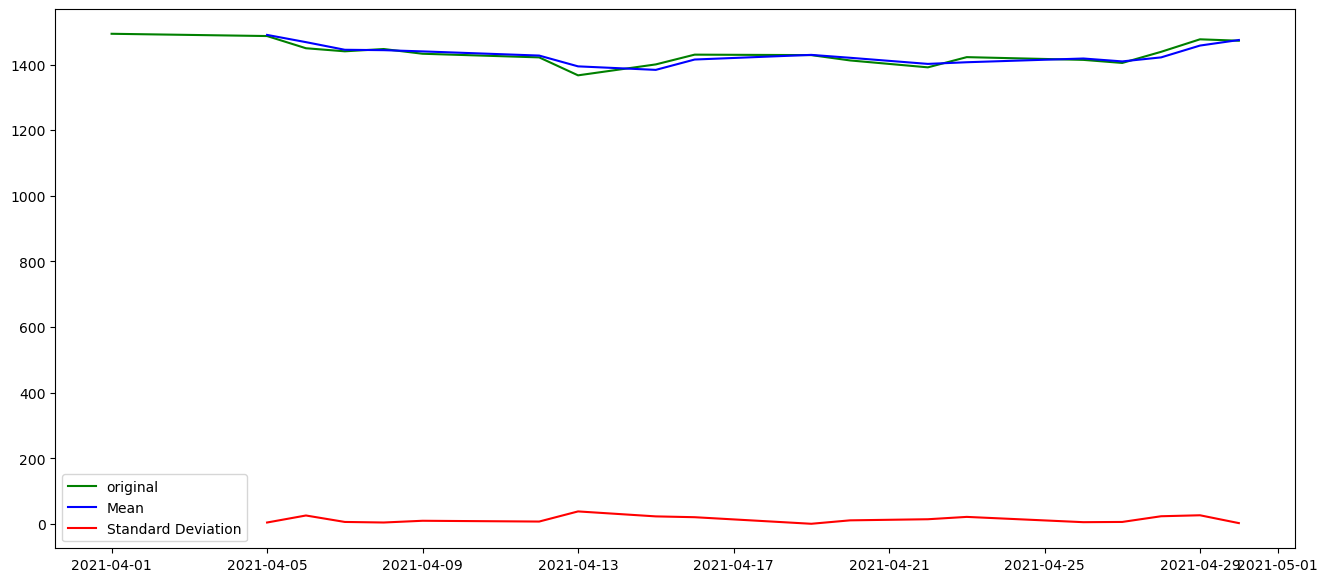

In [11]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
plt.plot(axis_df,color='green',label="original")
plt.plot(rollmean, color='blue',label='Mean')
plt.plot(rollstd, color='red',label='Standard Deviation')
plt.legend()
plt.show

In [12]:
log_df=np.log(axis_df)

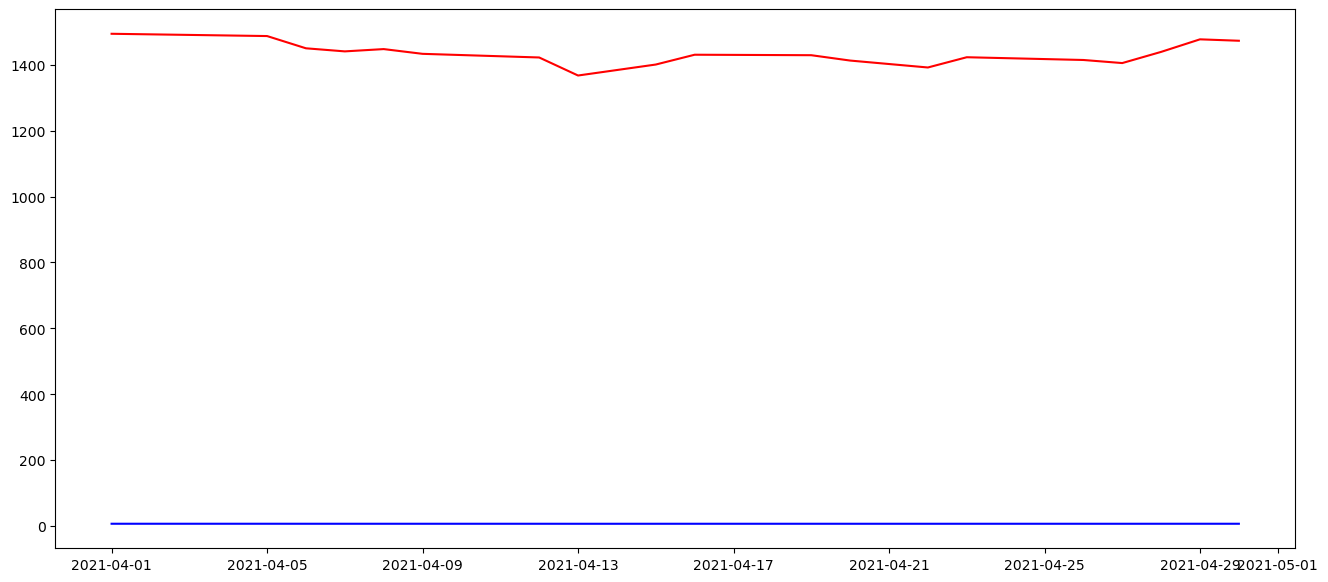

In [13]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
plt.plot(log_df, color='blue')
plt.plot(axis_df,color='red')

In [14]:
rollmeanlog = log_df.rolling(2).mean()
rollstdlog = log_df.rolling(2).std()

<function matplotlib.pyplot.show(close=None, block=None)>

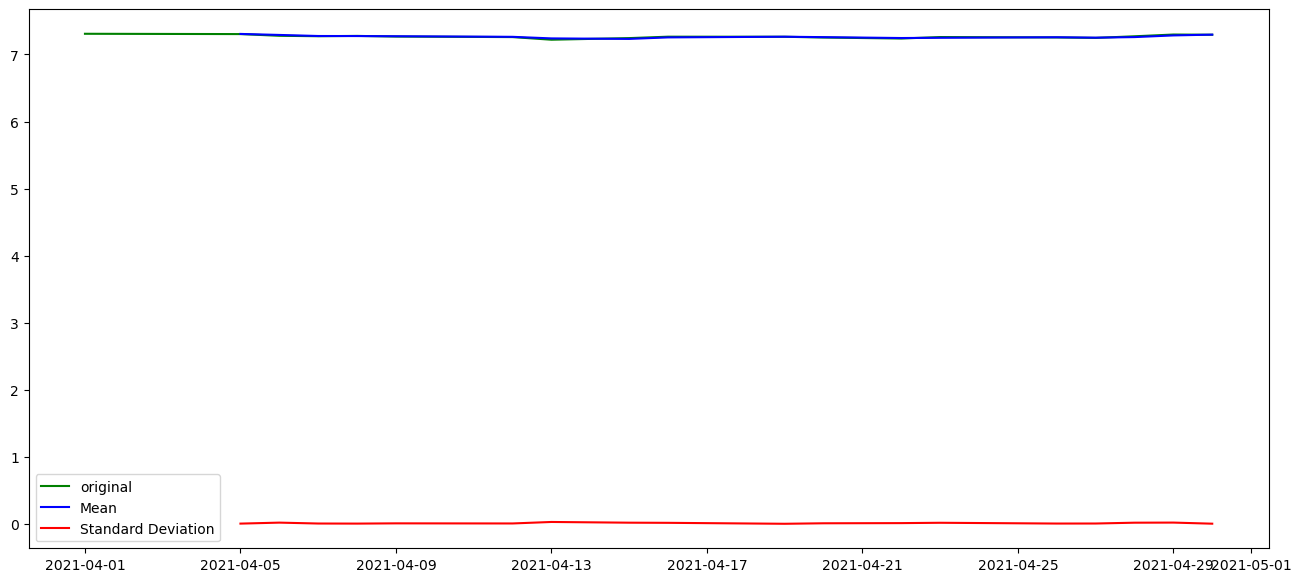

In [15]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
plt.plot(log_df,color='green',label="original")
plt.plot(rollmeanlog, color='blue',label='Mean')
plt.plot(rollstdlog, color='red',label='Standard Deviation')
plt.legend()
plt.show

<b>This has worked wonders!!! The dataset seems to be stationary with the logarithmic rolling mean</b> 

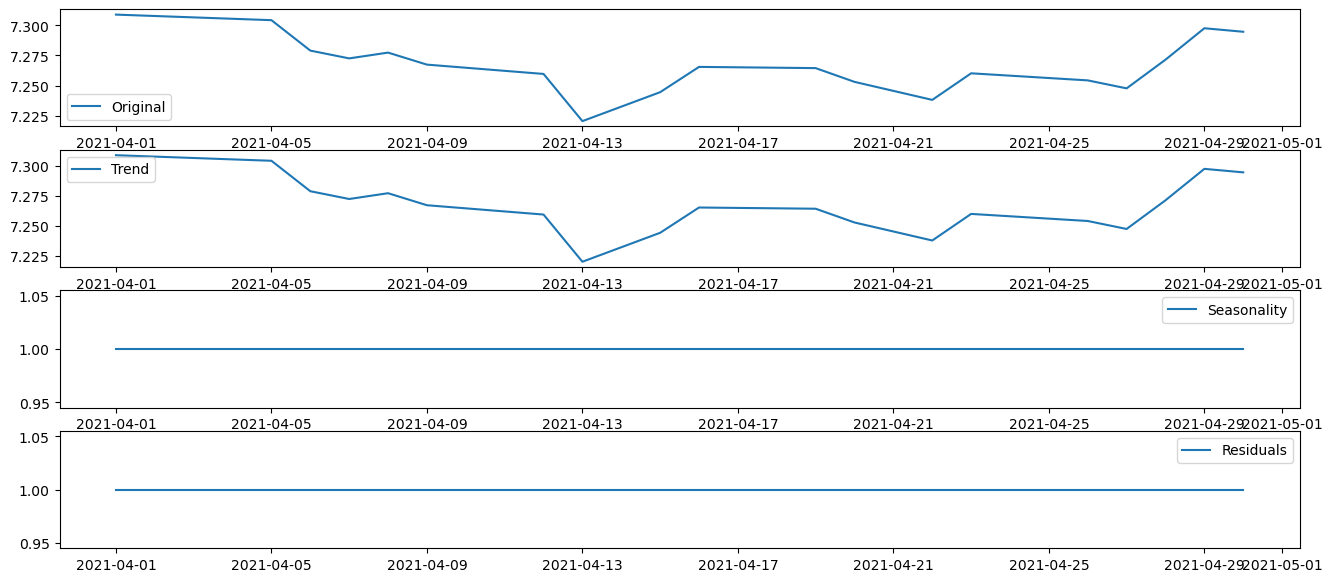

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_df,period=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(log_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

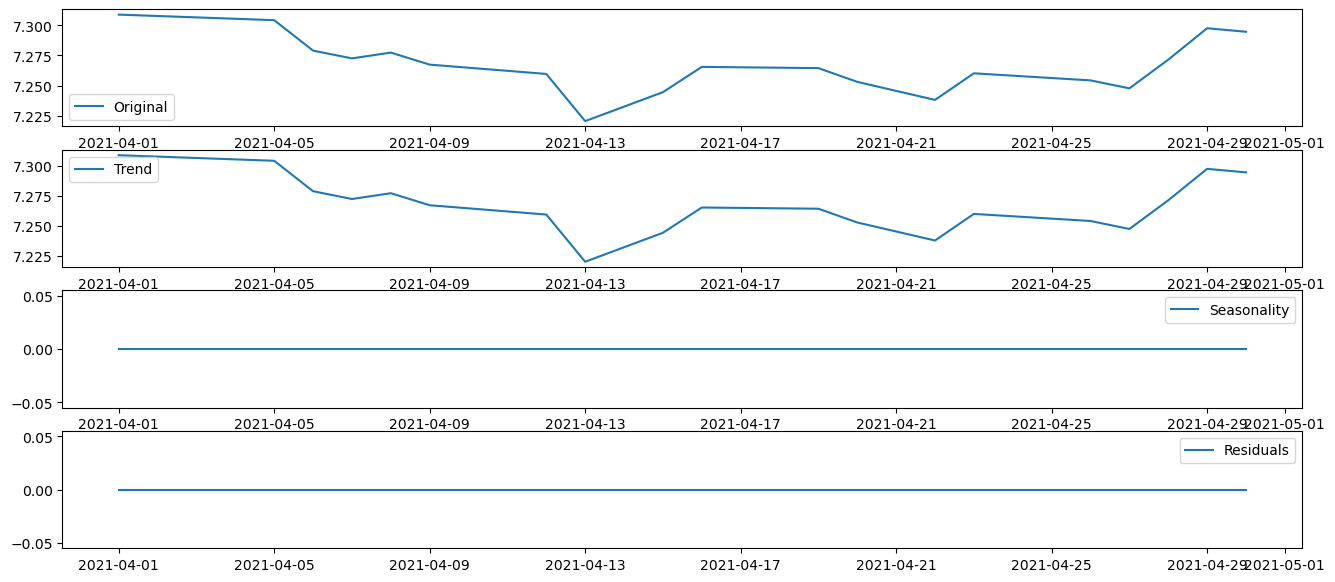

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_df,period=1,model = 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(log_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

It looks like there are no seasonality and residual components. This can happen when the data does not follow any regular seasonal patterns or has negligible seasonal fluctuations

it's important to note that differencing is commonly applied to time series data because many real-world datasets tend to be non-stationary. By differencing the data, you can often remove trends and seasonality, making the data more amenable to analysis and modeling

<b>Differencing</b>

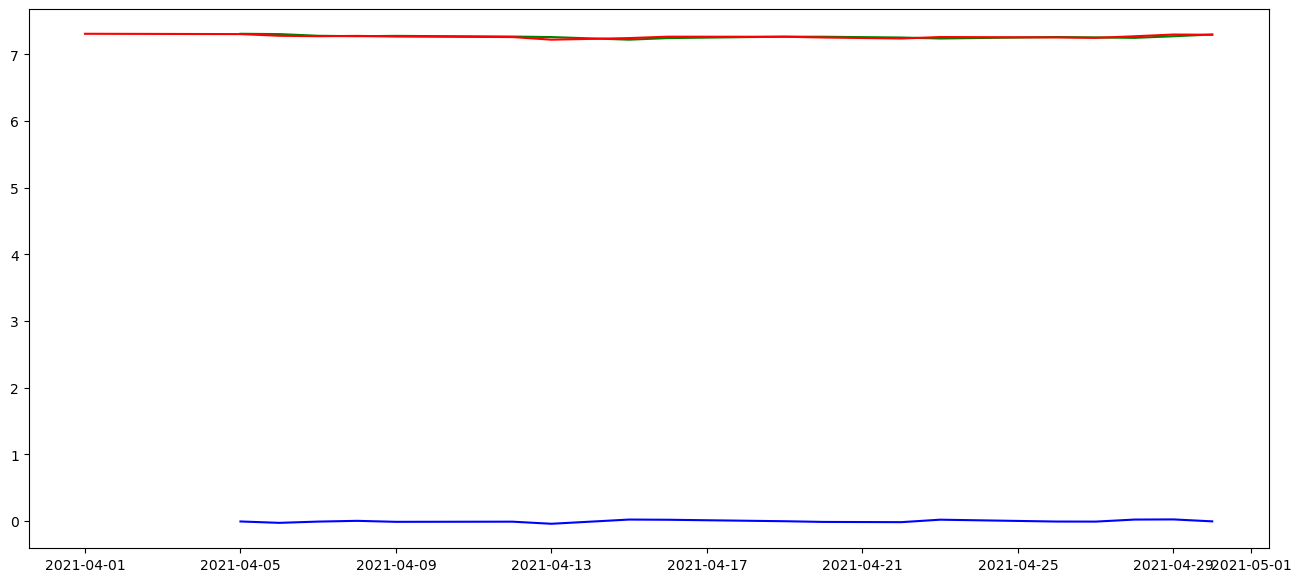

In [18]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
log_diff = log_df - log_df.shift(1)
plt.plot(log_df.shift(1), color='green')
plt.plot(log_df, color='red')
plt.plot(log_diff, color='blue')

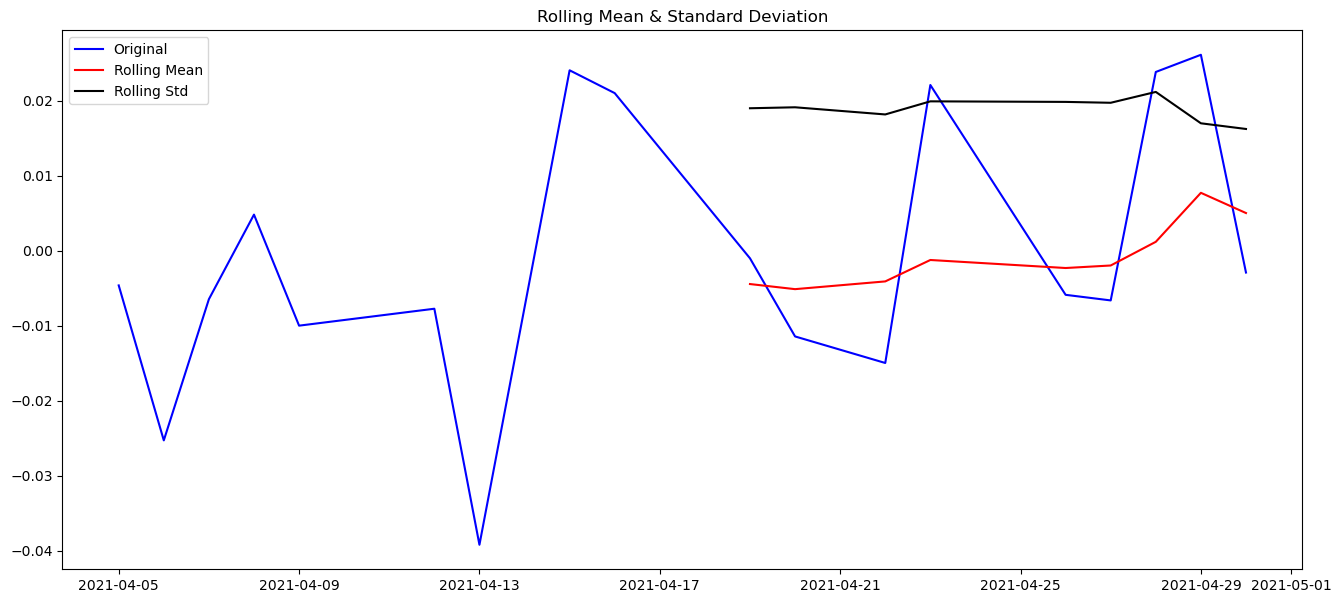

In [19]:
rolLmean_diff =log_diff.rolling(10).mean()
rolLstd_diff =log_diff.rolling(10).std()

#Plot rolling statistics:
plt.figure(figsize=(16,7))
plt.plot(log_diff, color='blue',label='Original')
plt.plot(rolLmean_diff, color='red', label='Rolling Mean')
plt.plot(rolLstd_diff, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The differenced series should ideally show no discernible trend. If the original data had a trend, differencing would help remove it. A flat differenced series indicates that the trend component has been eliminated

The rolling mean should ideally be close to zero or constant, indicating no systematic upward or downward shift. The rolling standard deviation should ideally remain relatively constant or show only minor fluctuations

In [20]:
from statsmodels.tsa.arima_model import ARIMA


In an ARIMA model, the order parameter specifies the order of the autoregressive (AR), differencing (I), and moving average (MA) components. It is denoted as (p, d, q).

Autoregressive (AR) component (p): The p parameter represents the number of lagged terms included in the model. A higher p value indicates a more complex model that considers a longer history of the time series.

Differencing (I) component (d):
The differencing component removes trends and seasonality from the time series by computing the differences between consecutive observations. The d parameter represents the number of times differencing is applied to achieve stationarity.

Moving Average (MA) component (q):
    The moving average component captures the short-term dependencies between the current value of the time series and its past error terms (residuals). The q parameter represents the number of lagged error terms included in the model
    

# Finding P, D, Q

Autocorrelation Function (ACF) plot:

The ACF plot shows the correlation between each observation in the time series and its lagged values.
Significant spikes in the ACF plot represent correlations between the observations at different lags.
A spike at lag k indicates a strong correlation between the observation and its value k time periods ago.
For an ARIMA model, the significant spikes in the ACF plot can help identify the potential value of the Moving Average (MA) parameter q.
The number of significant lags where the ACF drops to zero after the initial spike indicates the potential value of q.

In [21]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_diff, nlags=8)
lag_pacf = pacf(log_diff, nlags=8)

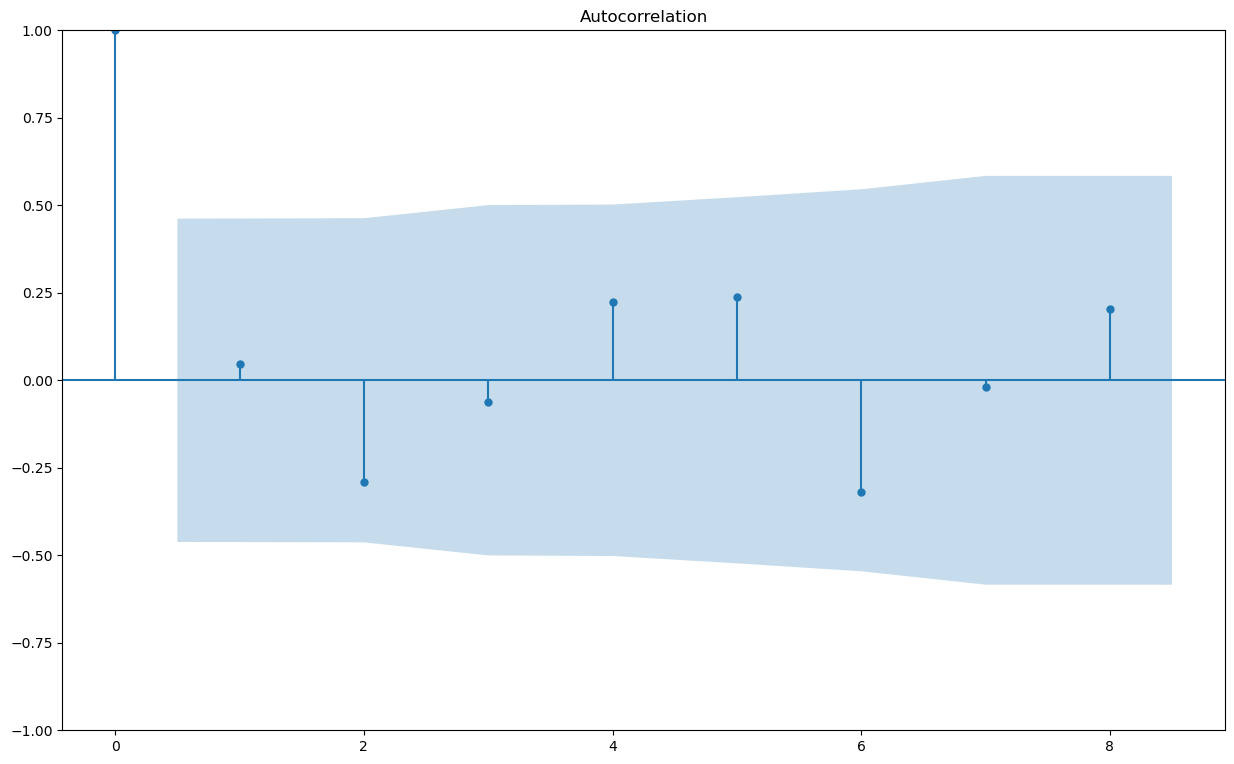

In [22]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(log_diff.dropna(),lags=8,ax=ax1)

In an ACF plot, the value at lag 0 is always 1 because it represents the correlation of an observation with itself. It is not considered a spike and does not provide much information for determining the order of the Moving Average (MA) component (q) in an ARIMA model.

Spike can be seen at 6 and even more at 11 FOR AXIS BANK and at 6 for HDFC bank.

Partial Autocorrelation Function (PACF) plot:

The PACF plot shows the correlation between each observation in the time series and its lagged values while controlling for the intermediate lags.
Significant spikes or cutoffs in the PACF plot represent correlations between the observations at different lags after removing the effect of intermediate lags.
A spike at lag k in the PACF plot indicates a strong correlation between the observation and its value k time periods ago, after removing the effect of the intermediate lags.
For an ARIMA model, the significant spikes or cutoffs in the PACF plot can help identify the potential value of the Autoregressive (AR) parameter p.
The number of significant lags where the PACF drops to zero after the initial spike indicates the potential value of p.

For example, let's say you have a PACF plot with the following spike pattern:

Significant spike at lag 1
Insignificant spikes at lags 2 and 3
Significant spike at lag 4
Based on this pattern, the potential value of p would be 1 or 4, as these lags show significant spikes. 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


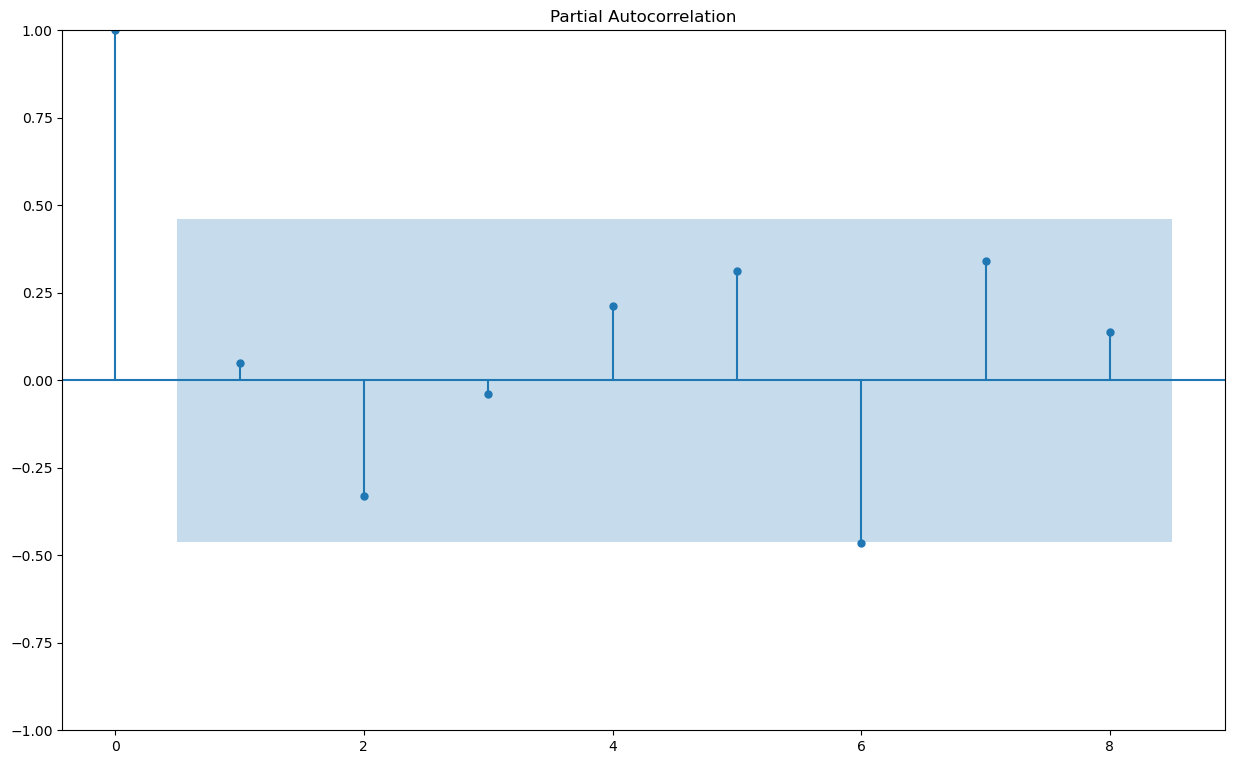

In [23]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(log_diff.dropna(),lags=8,ax=ax1)

Order of Differencing (d):

Differencing is used to remove trends and make the time series stationary.
The number of times differencing is required to achieve stationarity is denoted as d in the ARIMA model. d=1

In [34]:
plt.figure(figsize=(16,8))
import statsmodels.api as sm
model = sm.tsa.ARIMA(log_diff, order=(6, 1, 6))
results = model.fit()


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observa

<Figure size 1600x800 with 0 Axes>

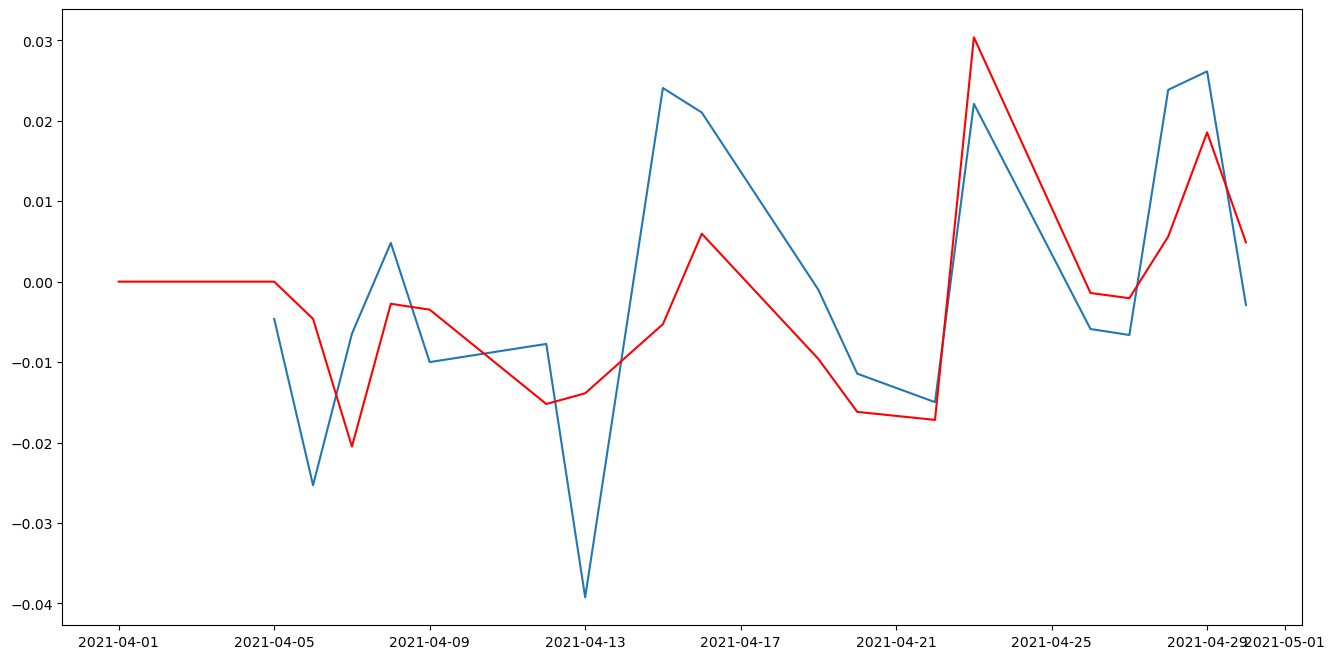

In [35]:
plt.figure(figsize=(16,8))
plt.plot(log_diff)
plt.plot(results.fittedvalues, color='red')

In [36]:
ARIMA_diff_predictions = pd.Series(results.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2021-04-01    0.000000
2021-04-05    0.000000
2021-04-06   -0.004630
2021-04-07   -0.020499
2021-04-08   -0.002753
dtype: float64


By calculating the cumulative sum of the fitted values, you can obtain a series of values that represents the cumulative effect of the predictions. For example, let's consider a series of numbers: [1, 2, 3, 4, 5]. The cumulative sum of this series would be: [1, 3, 6, 10, 15].

In [37]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2021-04-01    0.000000
2021-04-05    0.000000
2021-04-06   -0.004630
2021-04-07   -0.025130
2021-04-08   -0.027883
dtype: float64


Below calculates the ARIMA predictions in the log scale by adding the cumulative sum of the differenced predictions to the initial log value of the time series.

In [38]:
ARIMA_log_prediction = pd.Series(log_df.iloc[0], index=log_df.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2021-04-01    7.308978
2021-04-05    7.308978
2021-04-06    7.304348
2021-04-07    7.283848
2021-04-08    7.281095
dtype: float64

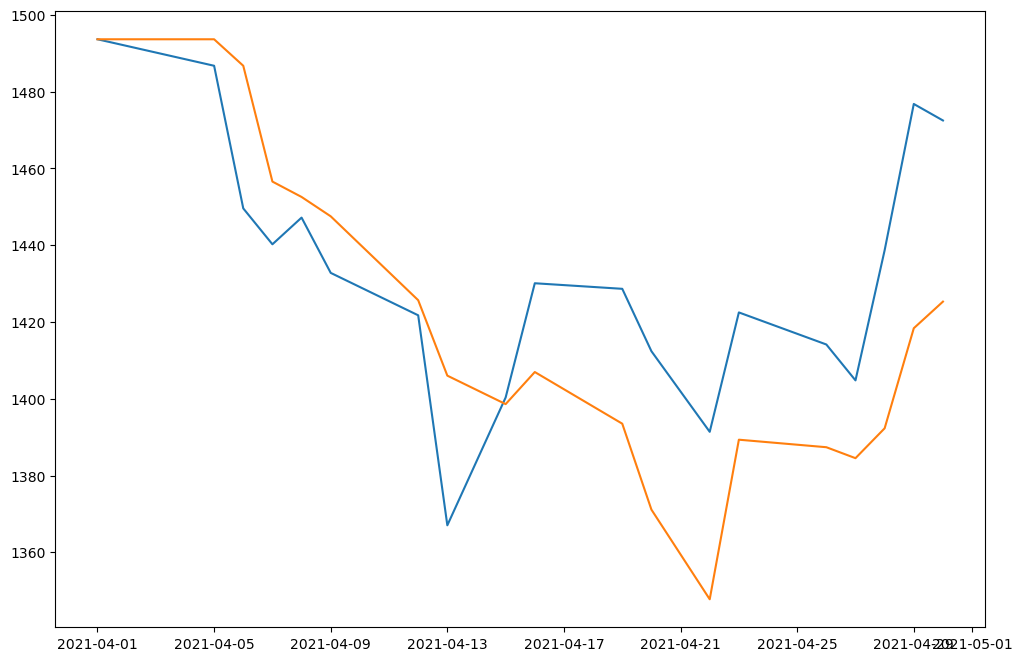

In [39]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(axis_df)
plt.plot(predictions_ARIMA)

# Calculating RMSE

It's important to note that the number of model parameters subtracted from the total number of observations accounts for the degrees of freedom in the model, providing an unbiased estimate of the model's prediction error.

In [40]:
RMSE=np.sqrt(sum((predictions_ARIMA-axis_df)**2)/(len(axis_df)))

In [41]:
RMSE

31.513036077889385

# MAPE

In [42]:
percentage_diff = np.abs((predictions_ARIMA-axis_df) / axis_df)

# Calculate MAPE
mape = np.mean(percentage_diff) * 100

In [43]:
mape

1.8417819773497768